# Z-Score Outlier Detection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [25]:
data = [10, 12, 12, 13, 12, 14, 15, 16, 20, 150,12,34,140,12,11,14,10,15,16,17,18,19,20,24,12,15,10] 

In [34]:
# Calculate Z-scores
zscore=stats.zscore(data)

z_scores = np.abs(zscore)

# Define threshold for outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

print("Z-Scores:", z_scores)
print("outliers indices",outliers)
data[9],data[12]

Z-Scores: [0.43448424 0.37626551 0.37626551 0.34715614 0.37626551 0.31804678
 0.28893741 0.25982804 0.14339058 3.64082699 0.37626551 0.26414054
 3.34973333 0.37626551 0.40537487 0.31804678 0.43448424 0.28893741
 0.25982804 0.23071868 0.20160931 0.17249995 0.14339058 0.02695312
 0.37626551 0.28893741 0.43448424]
outliers indices (array([ 9, 12], dtype=int64),)


(150, 140)

In [35]:
def detect_outliers(sample_data):
    outliers = []
    threshold = 3  # Define threshold as 3 standard deviations

    mean = np.mean(sample_data)
    std_dev = np.std(sample_data)

    for i in data:
        z_score = (i - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers



outliers = detect_outliers(data)
print("Outliers detected using z-score:", outliers)


Outliers detected using z-score: [150, 140]


# Interquartile Range (IQR) Outlier Detection

In [37]:

def detect_outliers_iqr(sample_data):
    # Step 1: Sort the data
    sorted_data = sorted(sample_data)

    # Step 2: Calculate Q1 and Q3
    q1, q3 = np.percentile(sorted_data, [25, 75])
    iqr = q3 - q1

    # Step 3: Calculate lower and upper fences
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    # Step 4: Identify outliers
    outliers = [i for i in sorted_data if i < lower_fence or i > upper_fence]

    return outliers, lower_fence, upper_fence



In [38]:
outliers, lower_fence, upper_fence = detect_outliers_iqr(data)
print("Outliers detected using IQR:", outliers)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)

Outliers detected using IQR: [34, 140, 150]
Lower fence: 2.25
Upper fence: 28.25


In [39]:
2!=6

True

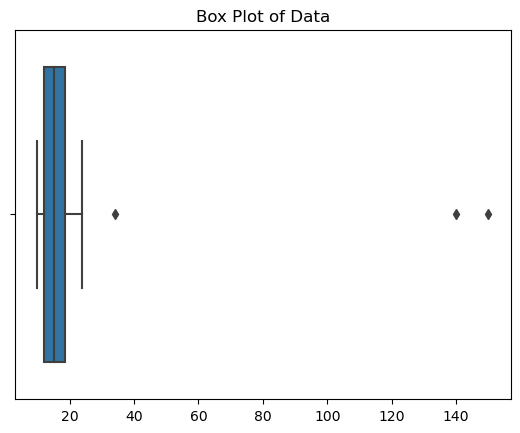

In [20]:
# Plotting the data with a box plot
# sns.boxplot(x=data)
# plt.title('Box Plot of Data')
# plt.show()

In [ ]:
y
|
|        *       
|      *   *     
|    *       *   
|  *           *
|*-------------- x
 